# Прогноз вероятности оттока пользователей фитнес-центра

_____________________

##### Шаг 1. Изучение данных и подготовка к анализу
* [Загрузка библиотек, получение общей информации, изучение и оптимизация данных](#section1)

##### Шаг 2. Исследовательский анализ данных (EDA) 
* [Просмотр статистических данных, построение распределений, расчет корреляции признаков](#section2)

##### Шаг 3. Построение модели прогнозирования оттока пользователей 
* [Построение модели бинарной классификации](#section3)

##### Шаг 4. Кластеризация пользователей
* [Стандартизация данных, построение дендрограммы и распределений признаков для кластеров](#section4)

##### Шаг 5 Выводы
* [Вывод и рекомендации](#section5)
____________________

### Описание проекта

На основе аналитических данных сети фитнес-центров «Культурист-датасаентист» разработаем стратегию взаимодействия с пользователями. Спрогнозируем вероятность оттока (на уровне следующего месяца) для каждого клиента, сформируем типичные портреты пользователей, проанализируем основные признаки, наиболее сильно влияющие на отток.

Набор данных включает следующие поля:
* 'Churn' — факт оттока в текущем месяце;
* 'gender' — пол
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
* 'Phone' — наличие контактного телефона
* 'Age' — возраст
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
* 'Group_visits' — факт посещения групповых занятий
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Здорово, что перед кодом есть описание задач проекта и данных, а также план твоих действий. Да и все оформление тетрадки выполнено на достойном уровне. Она рассказывает историю за тебя и показывает как твои кодинговые навыки, так и умение анализировать и преподносить информацию 👍🏻
    
Отдельно хочется похвалить за навигацию :)

## Шаг 1. Изучение данных и подготовка к анализу <a id='section1'></a>

In [1]:
# Иммпортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', 500) # все столбцы

In [4]:
pd.set_option('display.max_colwidth', 500) # все строки

In [5]:
# Загружаем данные
gym_churn = pd.read_csv('gym_churn.csv')
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
gym_churn.columns = gym_churn.columns.str.lower() # названия столбцов к нижнему регистру

In [7]:
# Смотрим информацию о данных
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [8]:
gym_churn['avg_class_frequency_total'] = gym_churn['avg_class_frequency_total'].astype('int')
gym_churn['avg_class_frequency_current_month'] = gym_churn['avg_class_frequency_current_month'].astype('int')

In [9]:
# Проверяем дубликаты
gym_churn.duplicated().sum()

0

##### Вывод

Дубликаты и пропущенные значения в данных отсуствуют, типы данных для признаков "средняя частота посещений в неделю за предыдущий месяц" и "суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон" заменили на целочисленный, названия столбцов привели к нижнему регистру. 

## Шаг 2. Исследовательский анализ данных (EDA) <a id='section2'></a>

Проверяем соотношение пользователей: ушедших и оставшихся в текущем месяце

In [10]:
gym_churn['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Смотрим статистическую информацию

In [11]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.00000,1.000000,1.000000,1.00000
near_location,4000.0,0.845250,0.361711,0.000000,1.00000,1.000000,1.000000,1.00000
partner,4000.0,0.486750,0.499887,0.000000,0.00000,0.000000,1.000000,1.00000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.00000,0.000000,1.000000,1.00000
phone,4000.0,0.903500,0.295313,0.000000,1.00000,1.000000,1.000000,1.00000
contract_period,4000.0,4.681250,4.549706,1.000000,1.00000,1.000000,6.000000,12.00000
group_visits,4000.0,0.412250,0.492301,0.000000,0.00000,0.000000,1.000000,1.00000
age,4000.0,29.184250,3.258367,18.000000,27.00000,29.000000,31.000000,41.00000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.86883,136.220159,210.949625,552.59074
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.00000,1.000000,6.000000,12.00000


Исходя из статистических данных средний клиент фитнес-центра это: клиент, который проживает или работает в районе фитнес-центра, мужчина или женщина 29 лет, заключивший договор в среднем на 4,6 месяца, не очень заинтересованный в групповых тренировках, посешающий центр в среднем 1,4 раза в неделю, записавшийся в фитнес-центр самостоятельно, а не по акции, оставивший центру номер телефона и бросивший фитнес в этом месяце:)

Смотрим средние значения признаков в двух группах — тех, кто ушел в отток (1) и тех, кто остался (0) 

In [12]:
gym_churn.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Формируем данные для осташихся и ушедших пользователей

In [13]:
churn_0 = gym_churn.query('churn == 0')
churn_1 = gym_churn.query('churn == 1')

Строим столбчатые гистограммы и распределения признаков для тех, кто остался

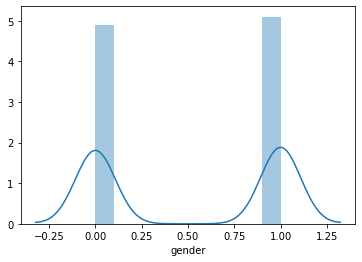

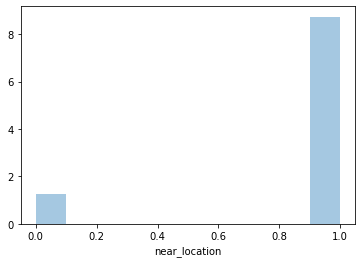

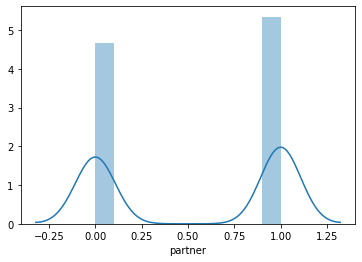

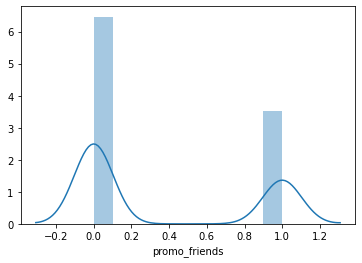

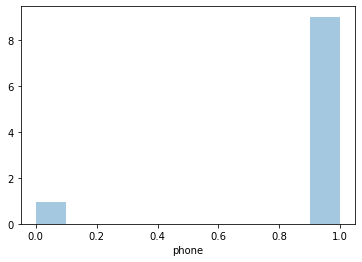

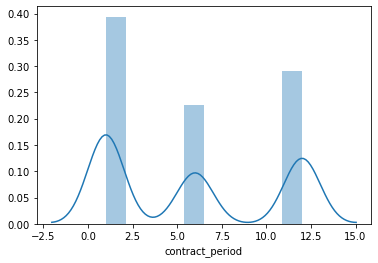

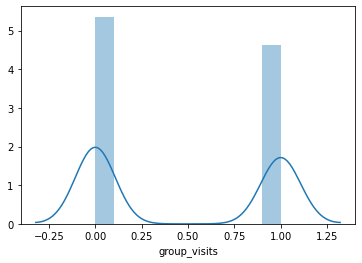

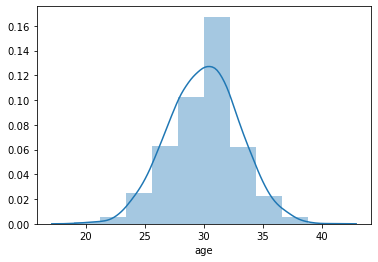

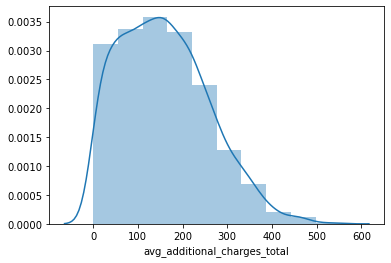

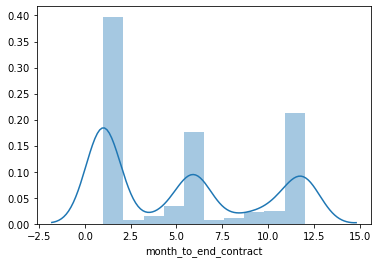

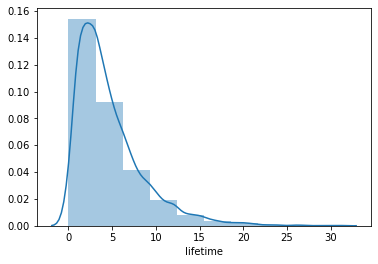

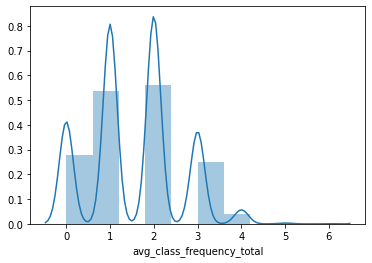

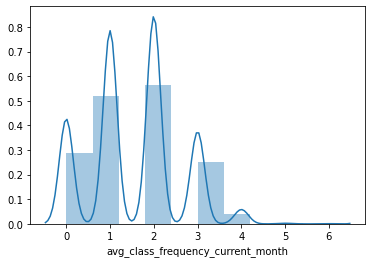

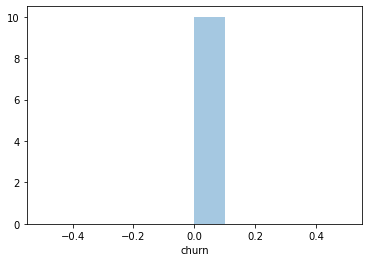

In [14]:
for feature in churn_0.columns:
  sns.distplot(churn_0[feature], bins = 10)
  plt.show() 

Строим столбчатые гистограммы и распределения признаков для тех, кто ушел

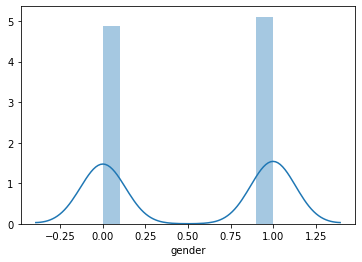

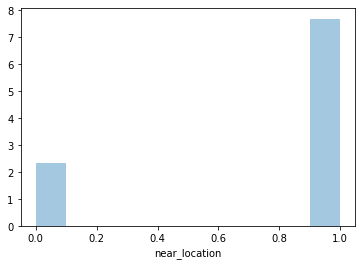

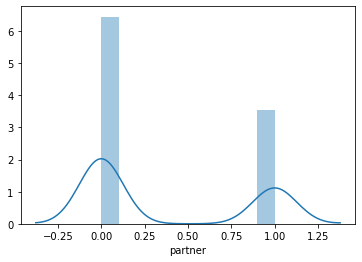

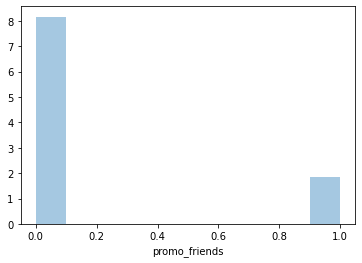

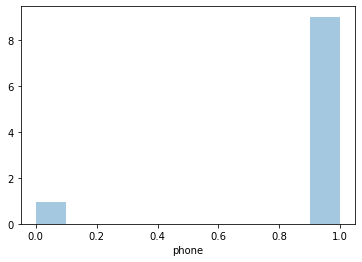

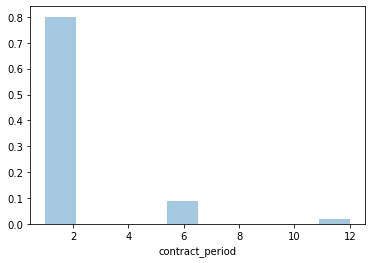

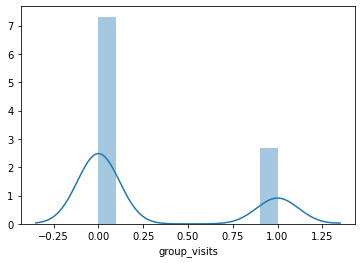

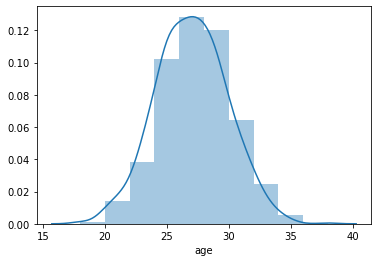

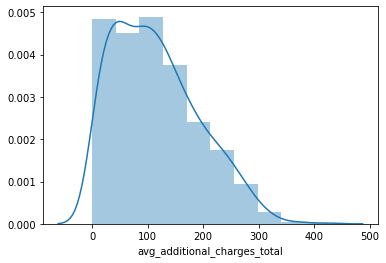

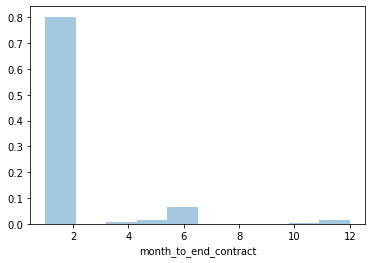

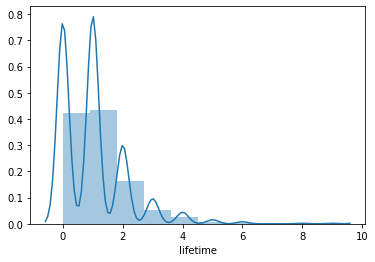

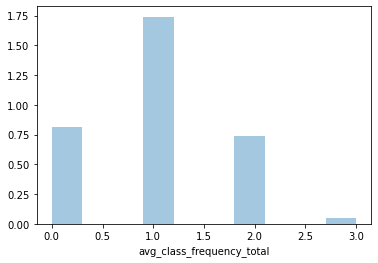

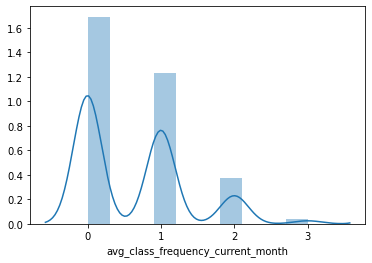

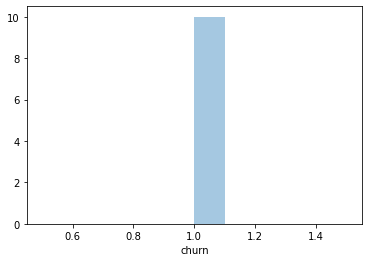

In [15]:
for feature in churn_1.columns:
  sns.distplot(churn_1[feature], bins = 10)
  plt.show() 

Считаем корреляцию признаков

In [16]:
gym_churn.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.008386,0.010869,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.046598,0.059591,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.030827,0.045768,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.035598,0.050070,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008589,0.004041,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096887,0.153482,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.062076,0.068129,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.110481,0.169130,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.045933,0.077335,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.089126,0.143264,-0.381393


Строим корреляцию признаков

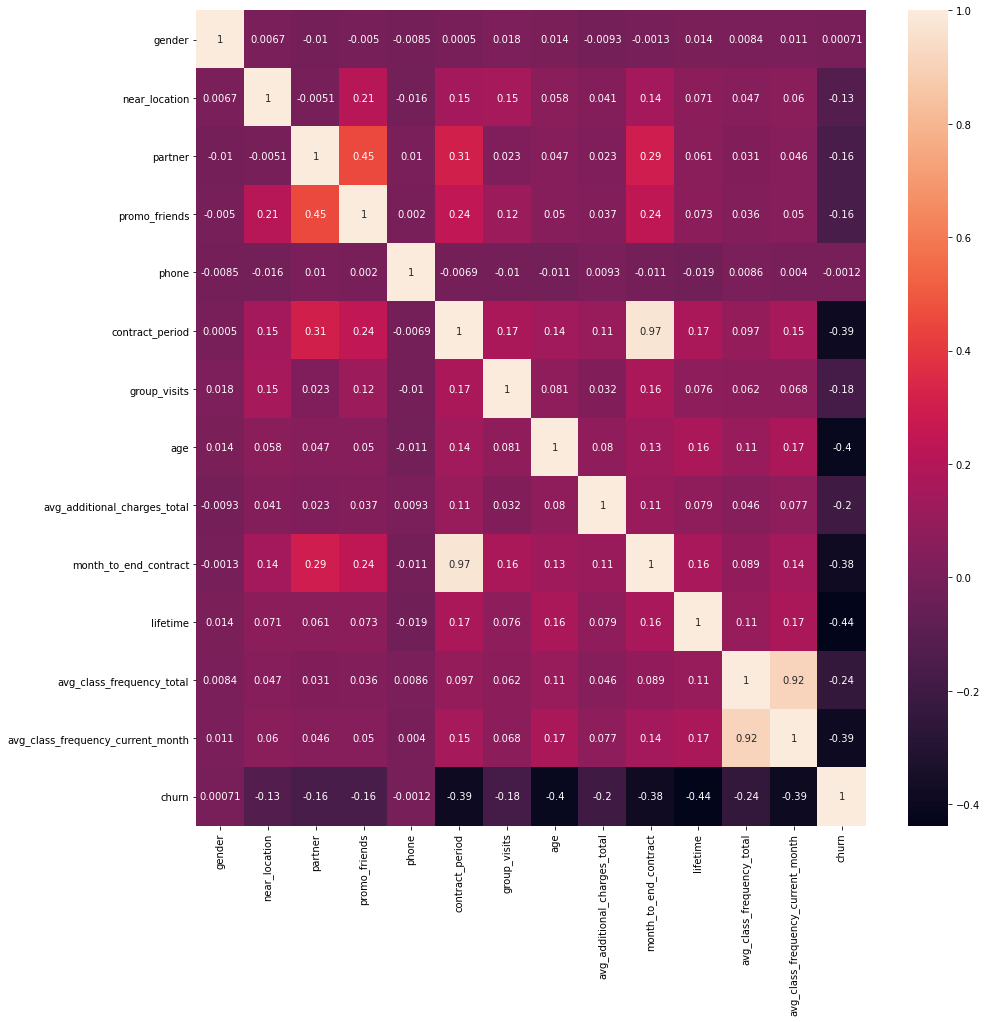

In [17]:
plt.figure(figsize = (15,15))
sns.heatmap(gym_churn.corr(), annot=True);

По матрице корреляцей можно сделать вывод, что больше всего на отток пользователей оказывают влияние: период договора, средняя частота посещений в неделю за предыдущий месяц и возраст клиента. Меньше всего - пол и наличие телефона. Также сильно коррелирует между собой связанные признаки такие как: период договора и срок до окончания текущего действующего абонемента, средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц.

##### Вывод

Отклонений и выбросов в данных нет. В двух группах — тех, кто ушел в отток и тех, кто остался, значения пола пользователей, наличие телефона распределены одинаково, при этом в данных отсутствует расшифровка, какой пол соответствует 0 или 1. В группе оставшихся больше пользователей, чем в группе оттока: работающих или живущих в районе нахождения фитнес-центра, являющихся сотрудниками компании-партнёра клуба, прищедшие в фитнец-центр по записи в рамках акции «приведи друга», купивших абонементы на 6 месяцев и более, посещающих групповые занятия, возрастом в среднем 29-30 лет, посещаюшие фитнес-цент в среднем 2 раза в неделю с даты покупки абонемента. Также пользователи, которые остались, тратят больше на другие услуги фитнес-центра: кафе, спорт-товары, косметический и массажный салон, что скорее является следствием. Так как признак "срок до окончания текущего действующего абонемента (в месяцах)" коррелирует с признаком "длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)", соотвественно в группе оставшихся больше пользователей, чем в группе оттока, которым осталось до окончания абонемента в среднем 5 месяцев. В группе оттока больше пользователей, которые посетили фитнес-центр один раз за предыдущий месяц или не были ни разу.

## Шаг 3. Построение модели прогнозирования оттока пользователей <a id='section3'></a>

Построем модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце, используя две модели обучения: логистическую регрессию и случайный лес. Удалим сильно коррелирующие признаки: средняя частота посещений в неделю за предыдущий месяц и срок до окончания текущего действующего абонемента (в месяцах).

In [18]:
# Разделяем данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop(columns=['churn', 'avg_class_frequency_current_month', 'month_to_end_contract'])
y = gym_churn['churn']

# разделяем модель на обучающую и валидационную выборку в соотношении 80/20
# устанавливаем stratify=y, чтобы сохранить соотношение 0 и 1 в обучающей и валидационной выборках, как в исходном наборе данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

# создаем объект класса StandardScaler и применяем его к обучающей выборке
scaler = StandardScaler()

#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train) 

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [19]:
# Случайный лес
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
y_pred_rf = rf_model.predict(X_test_st) 

# Градиентный бустинг
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train_st, y_train)
y_pred_lr = lr_model.predict(X_test_st)

In [20]:
# Создаем функцию расчета метрик
def metrics(y_test, y_pred, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))

In [21]:
metrics(y_test, y_pred_rf, 'Метрики для метода "Случайный лес"')

Метрики для метода "Случайный лес"
	Accuracy: 0.89
	Precision: 0.80
	Recall: 0.75


In [22]:
metrics(y_test, y_pred_lr, 'Метрики для метода "Логистическая регрессия"')

Метрики для метода "Логистическая регрессия"
	Accuracy: 0.90
	Precision: 0.82
	Recall: 0.82


##### Вывод

На основании метрик модель Логистическая регрессия показала лучше метрики Точность (precision), полнота (recall) и доля правильных ответов (Accuracy).

## Шаг 4. Кластеризация пользователей <a id='section4'></a>

Проводим стандартизацию данных и строим дендрограмму

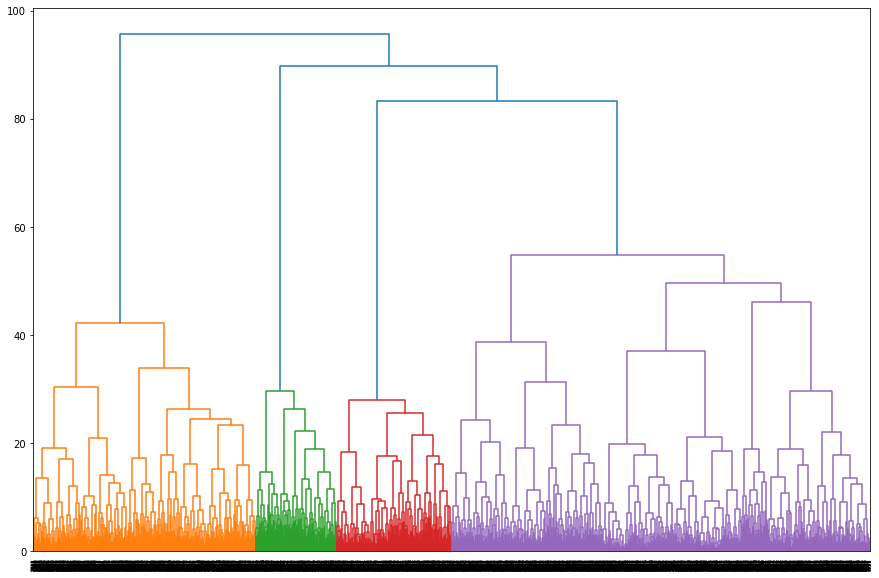

In [23]:
X_sc = scaler.fit_transform(X)
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

Обучаем модель кластеризации на основании алгоритма K-Means и прогнозируем кластеры клиентов

In [24]:
km = KMeans(n_clusters = 5, random_state = 0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров

# сохраняем метки кластера в поле датасета
gym_churn['cluster_km'] = labels

# смотрим на средние значения признаков для кластеров
gym_churn.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.500898,0.522388,0.496957,0.512500,0.523316
near_location,0.000000,0.995408,0.994929,1.000000,0.862694
partner,0.488330,0.439724,0.902637,0.183333,0.471503
promo_friends,0.077199,0.016073,1.000000,0.060833,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,2.978456,7.090700,6.900609,1.868333,4.777202
group_visits,0.231598,0.538462,0.521298,0.310000,0.427461
age,28.685817,30.719862,29.516227,27.991667,29.297927
avg_additional_charges_total,137.277472,178.007884,151.722734,125.836266,144.208179
month_to_end_contract,2.804309,6.438576,6.315416,1.808333,4.466321


Строим распределения признаков для кластеров

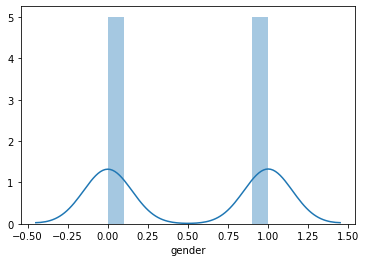

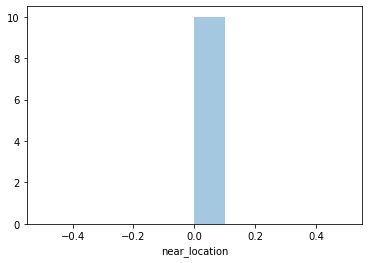

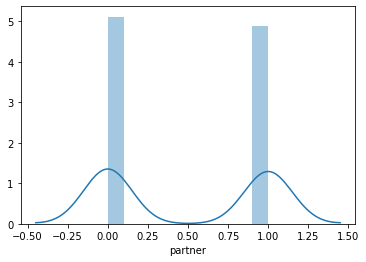

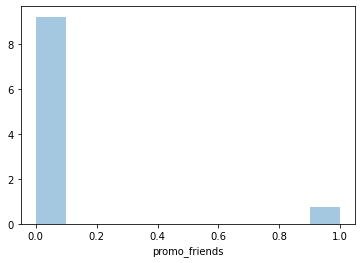

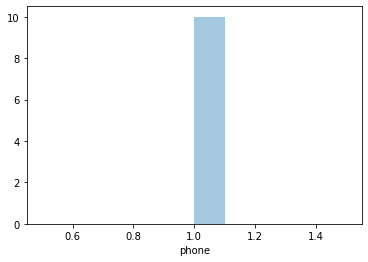

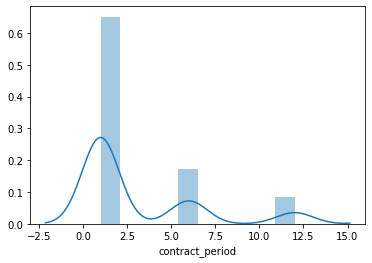

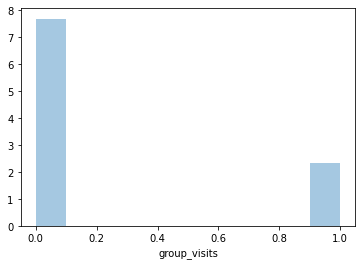

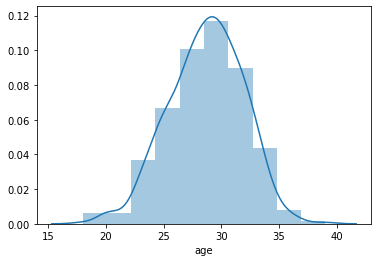

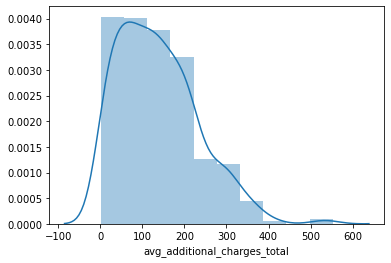

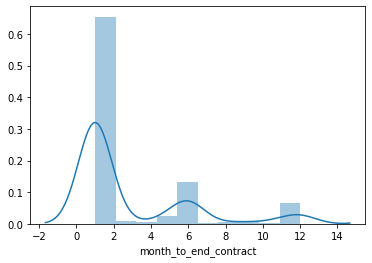

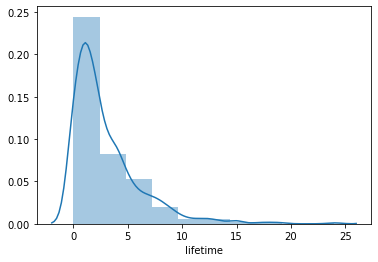

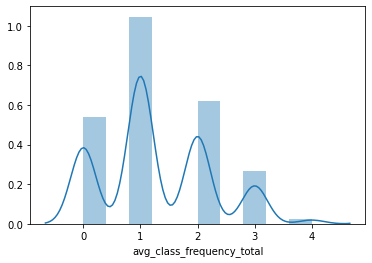

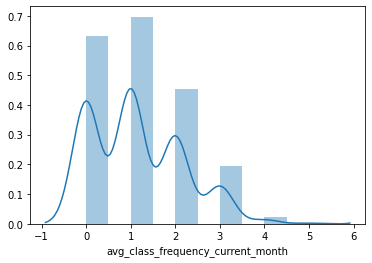

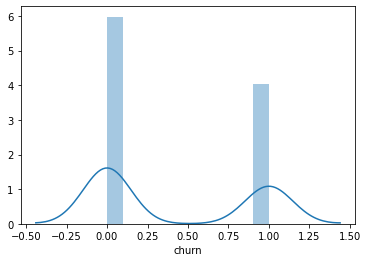

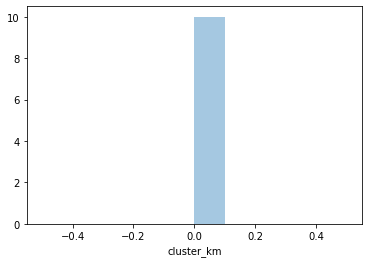

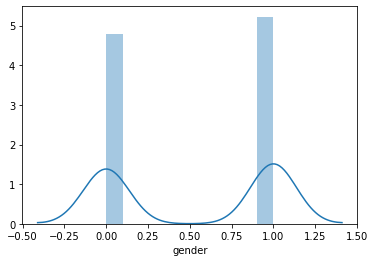

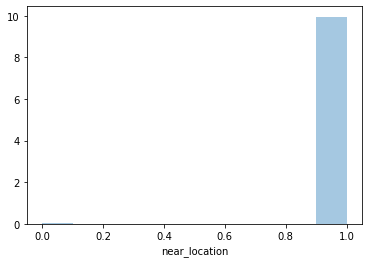

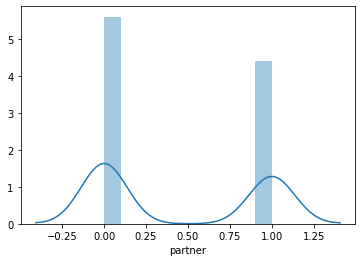

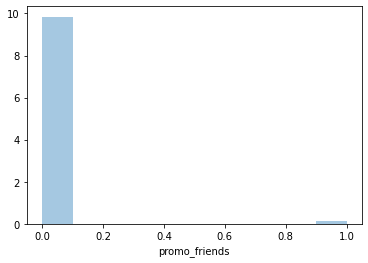

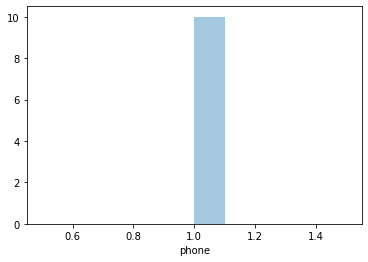

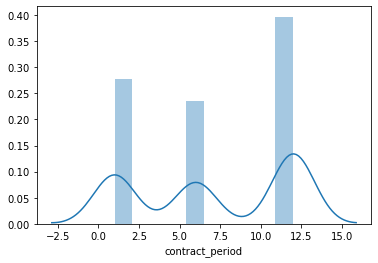

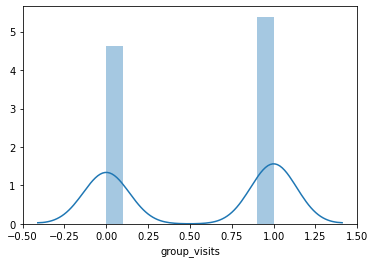

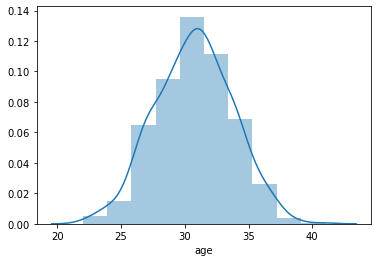

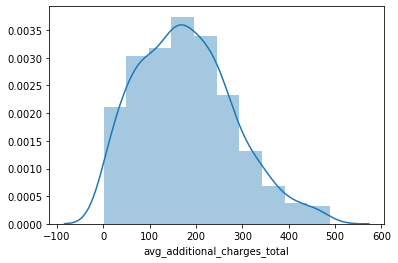

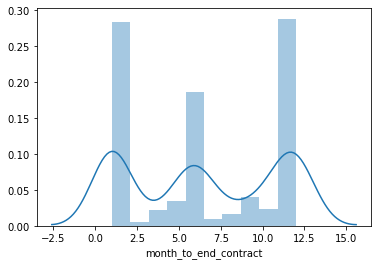

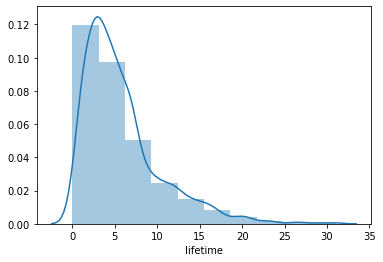

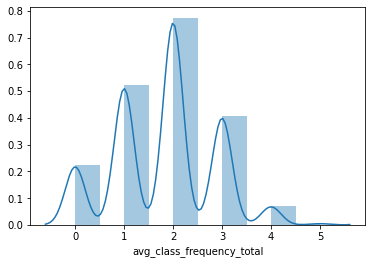

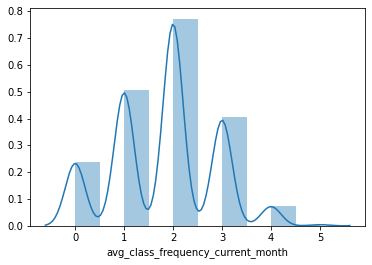

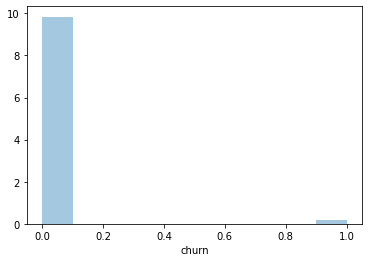

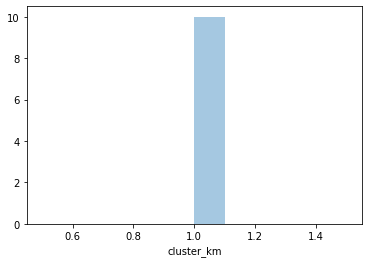

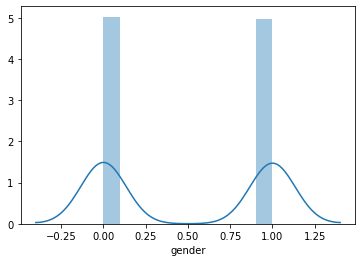

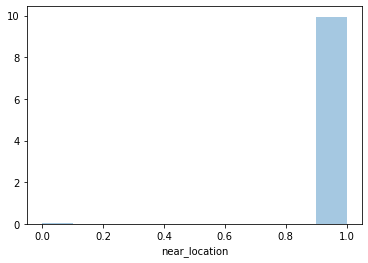

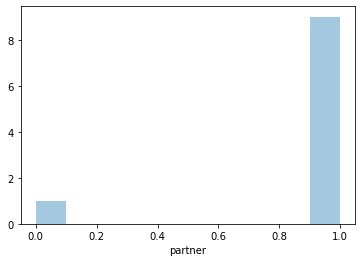

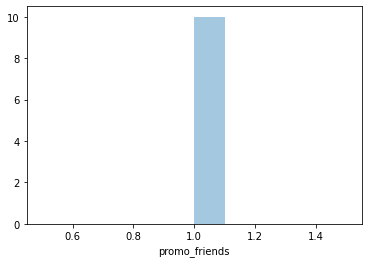

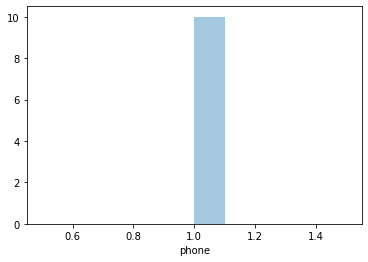

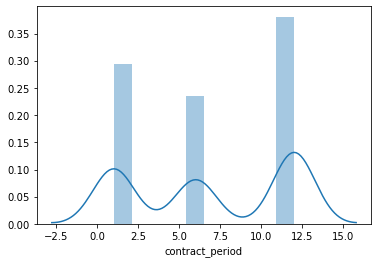

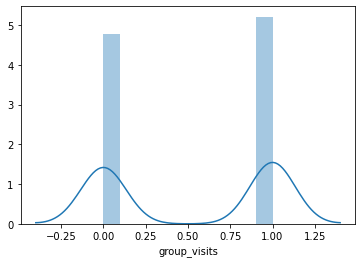

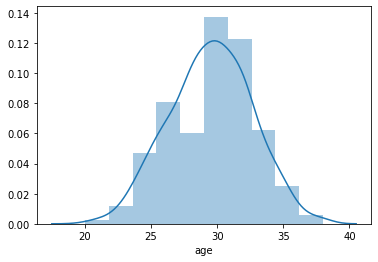

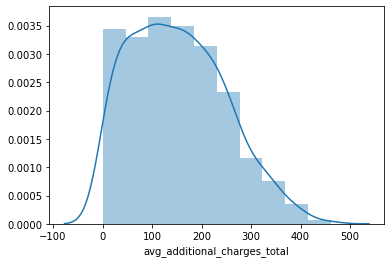

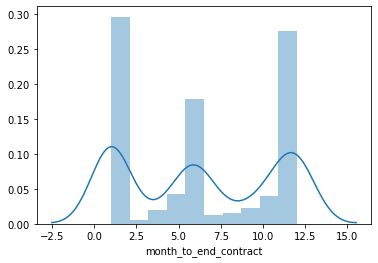

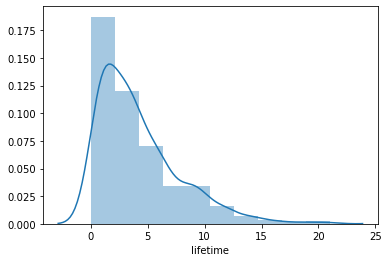

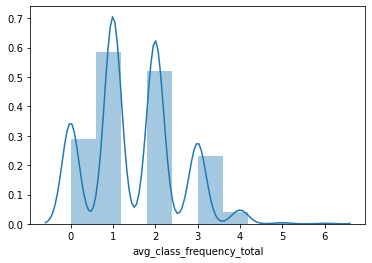

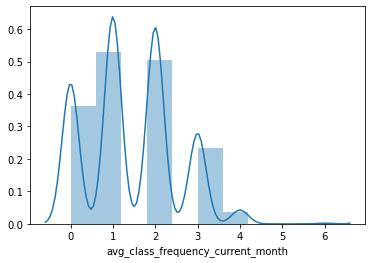

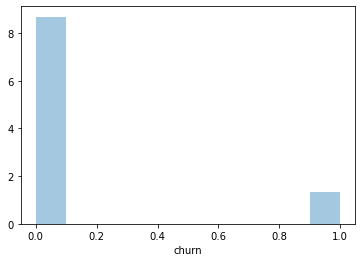

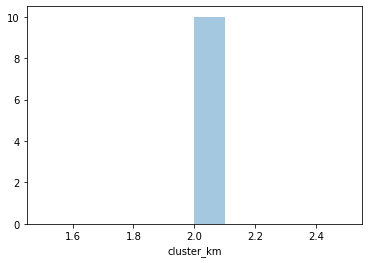

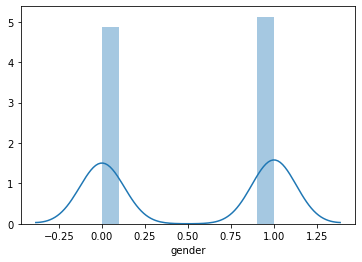

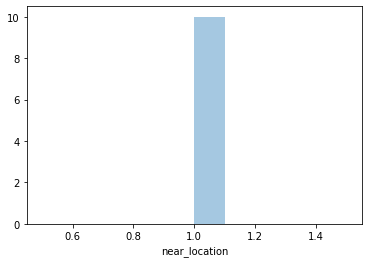

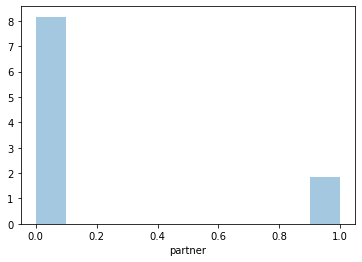

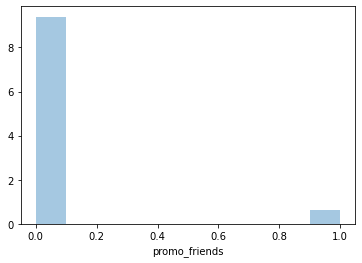

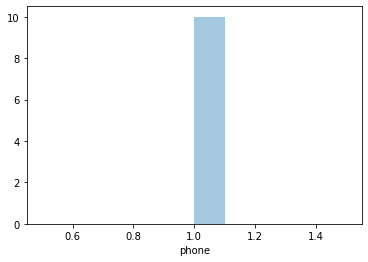

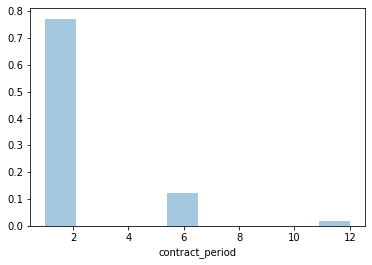

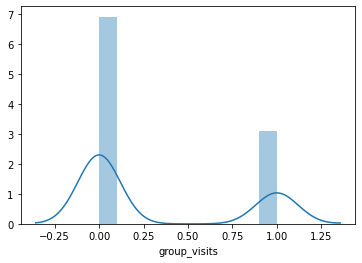

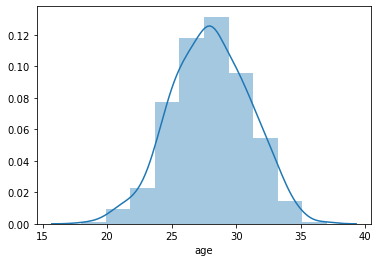

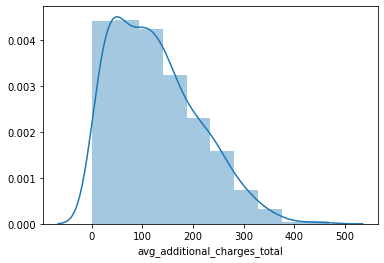

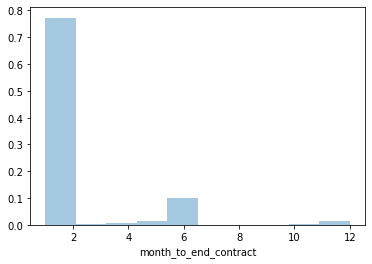

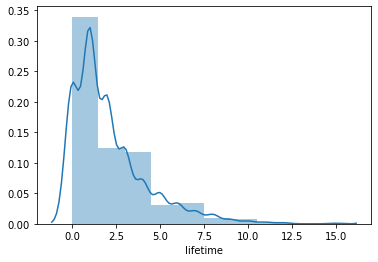

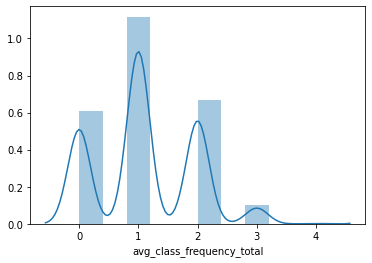

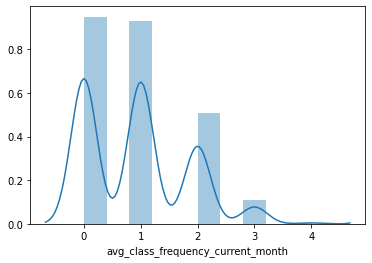

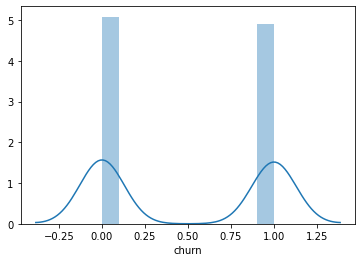

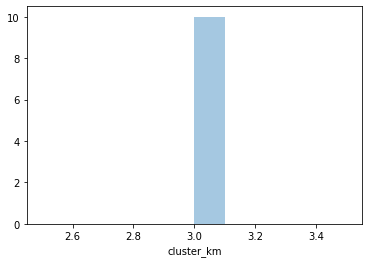

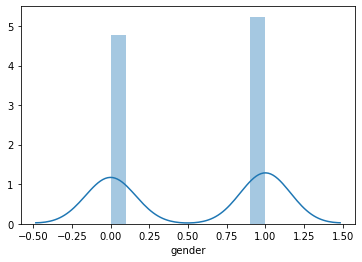

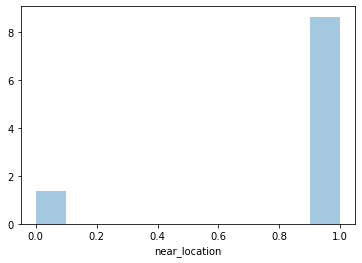

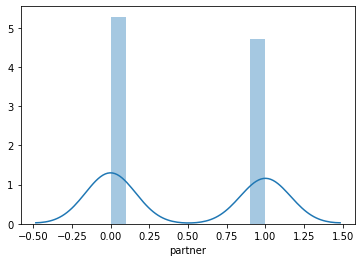

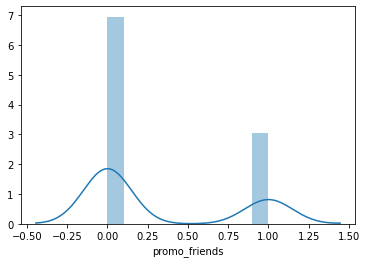

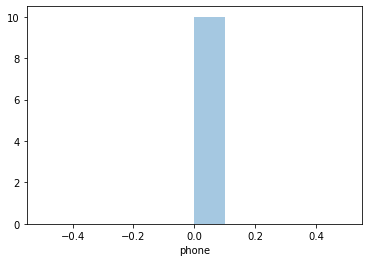

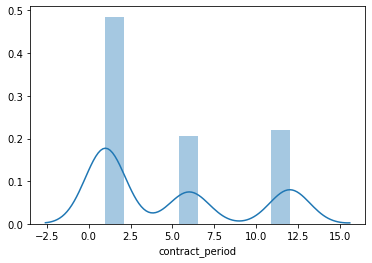

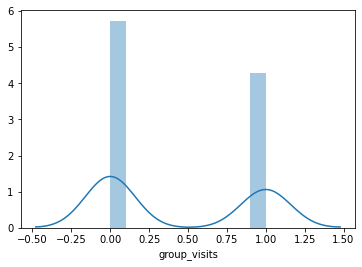

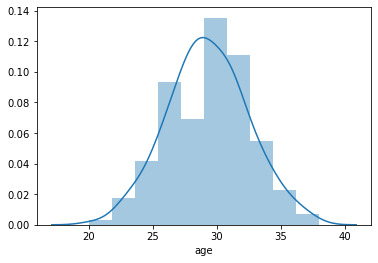

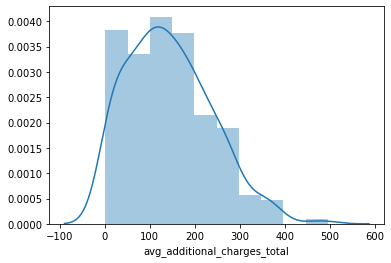

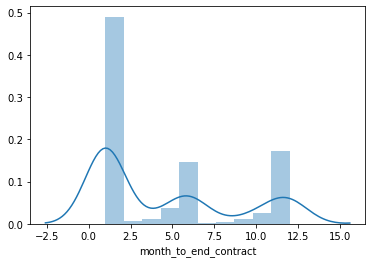

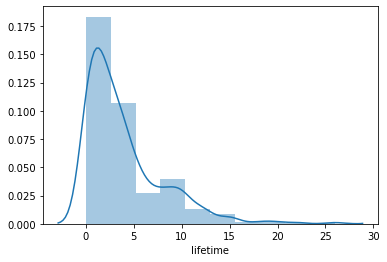

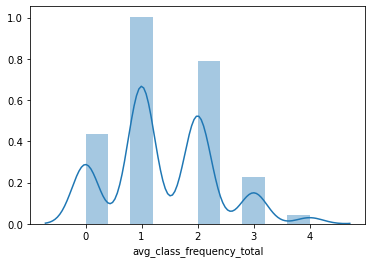

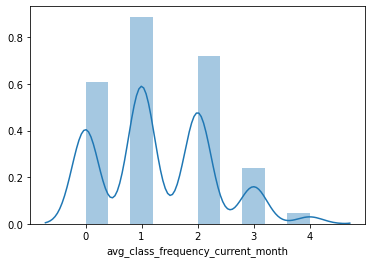

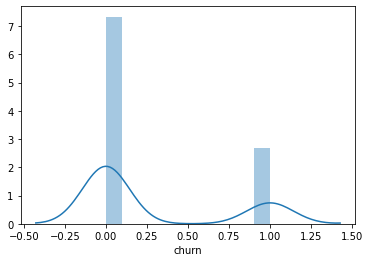

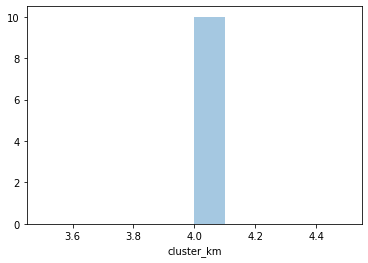

In [25]:
for i in [0, 1, 2, 3, 4]:
    
    cluster = gym_churn[gym_churn['cluster_km'] == i]
    for feature in cluster.columns:
        
        sns.distplot(cluster[feature], bins = 10)
        plt.show() 



Для каждого полученного кластера считаем долю оттока 

In [26]:
share = gym_churn.groupby('cluster_km').agg({'churn':['sum', 'count']})
share['churn_share'] = (share[('churn', 'sum')] /share[('churn', 'count')])
share

churn       churn_share
             sum count            
cluster_km                        
0            224   557    0.402154
1             14   871    0.016073
2            130   986    0.131846
3            590  1200    0.491667
4            103   386    0.266839

##### Вывод

В результате подсчета доли оттока пользователей для каждого кластера, выявлено, что самый надежный кластер второй (индекс 1) и третий (индекс 2). Для обоих кластеров характерно: проживание или работа клиентов в районе, где находится фитнес-центр. Для третьего кластера характерно то, что пользователи являются сотрудниками компании-партнёра клуба, пришли по записи в рамках акции «приведи друга», заключили договор на длительный срок 6 и 12 месяцев и посещают групповые тренировки. Для второго кластера характерно то, что пользователи посещают фитнес-центр 2 раза в неделю. 

Больше всего ушло пользователей из четвертого кластера (индекс 3) и первого кластера (индекс 0). Для обоих кластеров характерно: пользователи записались самостоятельно, купили абонемент на небольшой срок 1-3 месяца, не посещают групповые тренировки посетили клуб один раз или не были ни разу. Для первого кластера характерно, что пользователи не живут или не работают в районе фитнес-центра. Для четвертого кластера характерно, что клиенты не являются сотрудниками компаний-партнеров. Пол, возраст и наличие телефона не оказывают влияние на отток, распределены по кластерам практически равномерно.

## Шаг 5. Выводы и рекомендации <a id='section5'></a>

#### Выводы
* В результате исследовательского анализа данных (EDA) об оттоке пользователей фитнес-центра выявлено, что для пользователей, которые остались, наиболее характерно, чем для пользователей, которые ушли следующие признаки: работа или проживание в районе нахождения фитнес-центра, работа в компании-партнёра клуба, запись в фитнес-центр в рамках акции «приведи друга», покупка абонементов на срок 6 месяцев и более, посещение групповых занятий, возраст в среднем 29-30 лет, посещение фитнес-центра в среднем 2 раза в неделю с даты покупки абонемента. В группе оттока больше пользователей, которые посетили фитнес-центр один раз за предыдущий месяц или не были ни разу.

* Построена модель прогнозирования оттока пользователей (на уровне следующего месяца) для каждого клиента.

* Проведена кластеризация пользователей. В результате подсчета доли оттока пользователей для каждого кластера, выявлено, что самый надежный кластер второй (индекс 1) и третий (индекс 2). Для обоих кластеров характерно: проживание или работа клиентов в районе, где находится фитнес-центр. Для третьего кластера характерно то, что пользователи являются сотрудниками компании-партнёра клуба, пришли по записи в рамках акции «приведи друга», заключили договор на длительный срок 6 и 12 месяцев и посещают групповые тренировки. Для второго кластера характерно то, что пользователи посещают фитнес-центр 2 раза в неделю. 

* Больше всего ушло пользователей из четвертого кластера (индекс 3) и первого кластера (индекс 0). Для обоих кластеров характерно: пользователи записались самостоятельно, купили абонемент на небольшой срок 1-3 месяца, не посещают групповые тренировки посетили клуб один раз или не были ни разу. Для первого кластера характерно, что пользователи не живут или не работают в районе фитнес-центра. Для четвертого кластера характерно, что клиенты не являются сотрудниками компаний-партнеров. Пол, возраст и наличие телефона не оказывают влияние на отток, распределены по кластерам практически равномерно.

#### Рекомендации
* Чтобы увеличить посещаемость фитнес-центра рекомендовано продолжать проведение акции "Приведи друга" и предоставление бонусов для сотрудников компаний-партнеров.
* Чтобы уменьшить отток рекомендовано привлекать пользователей на групповые тренировки, предлагать бонус при покупке абонемента на 6-12 месяцев, обратить внимание на заинтересованность пользователей, проживающих или работающих в районе фитнес-центра.
